In [1]:
import pandas as pd

df = pd.read_csv('coaut.txt', sep='\t')

In [2]:
df2 = df.copy()

In [3]:
def time_to_year(cell):
    return int(cell[:4])

df2['time'] = df2['time'].apply(time_to_year)

In [4]:
def get_no_of_authors(cell): # For getting the number of authors for each row
    return round(1/cell)

df2['no_authors'] = df2['weight'].apply(get_no_of_authors) # Making the number-of-authors column

In [5]:
df2 = df2.drop_duplicates(subset=['transaction', 'fact_u'], keep='first')

In [6]:
del df2['fact_v']
del df2['weight']

df2 = df2.rename(columns = {'fact_u': 'author'})

In [7]:
df2

,time,domain,transaction,author,no_authors
0,1893,PRI,10.1103/PhysRevSeriesI.1.1,14436,1
1,1893,PRI,10.1103/PhysRevSeriesI.1.19,74739,1
2,1893,PRI,10.1103/PhysRevSeriesI.1.51,112954,2
4,1893,PRI,10.1103/PhysRevSeriesI.1.51,136201,2
6,1893,PRI,10.1103/PhysRevSeriesI.1.127,101528,1
...,...,...,...,...,...
18221236,2009,PRL,10.1103/PhysRevLett.103.267206,114300,7
18221243,2009,PRL,10.1103/PhysRevLett.103.267206,116627,7
18221250,2009,PRL,10.1103/PhysRevLett.103.267206,177131,7
18221257,2009,PRL,10.1103/PhysRevLett.103.267206,192035,7


In [8]:
# df3 = df2.copy()

# df2 = df2[df2['domain'] != 'PRI']
# df2 = df2[df2['domain'] != 'PR']
# df2 = df2[df2['domain'] != 'RMP']
# df2 = df2[df2['domain'] != 'PRL']
# df2 = df2[df2['domain'] != 'PRSTAB']
# df2 = df2[df2['domain'] != 'PRSTPER']

In [9]:
pra = df2[df2['domain'] == 'PRA']
del pra['domain']

prb = df2[df2['domain'] == 'PRB']
del prb['domain']

prc = df2[df2['domain'] == 'PRC']
del prc['domain']

prd = df2[df2['domain'] == 'PRD']
del prd['domain']

pre = df2[df2['domain'] == 'PRE']
del pre['domain']

In [10]:
pra_no_authors = []
prb_no_authors = []
prc_no_authors = []
prd_no_authors = []
pre_no_authors = []
no_authors_all = []

for i in range (1970, 2010):
    pra_no_authors.append(len(pra[pra['time'] == i]['author'].unique()))
    prb_no_authors.append(len(prb[prb['time'] == i]['author'].unique()))
    prc_no_authors.append(len(prc[prc['time'] == i]['author'].unique()))
    prd_no_authors.append(len(prd[prd['time'] == i]['author'].unique()))
    
    if i > 1992:
        pre_no_authors.append(len(pre[pre['time'] == i]['author'].unique()))

for i in range (1893, 2010):
    no_authors_all.append(len(df2[df2['time'] == i]['author'].unique()))

In [11]:
xax = [i for i in range(1970,2010)]
xax2 = [i for i in range(1993,2010)]
xax3 = [i for i in range(1893,2010)]

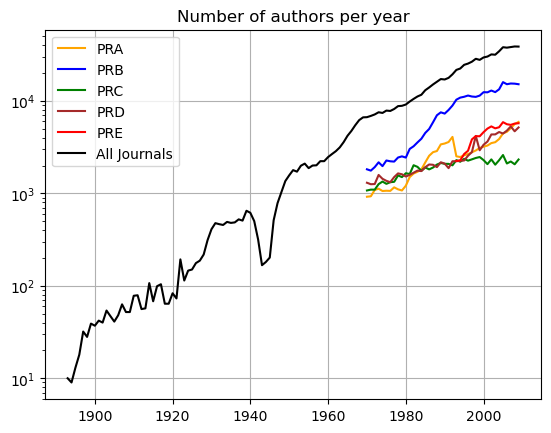

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=xax, y=pra_no_authors, color = 'orange', label='PRA')
sns.lineplot(x=xax, y=prb_no_authors, color = 'blue', label='PRB')
sns.lineplot(x=xax, y=prc_no_authors, color = 'green', label='PRC')
sns.lineplot(x=xax, y=prd_no_authors, color = 'brown', label='PRD')
sns.lineplot(x=xax2, y=pre_no_authors, color = 'red', label='PRE')

sns.lineplot(x=xax3, y=no_authors_all, color = 'black', label='All Journals')

plt.title('Number of authors per year')
plt.grid()
plt.legend()
plt.yscale('log')

In [13]:
pra_no_papers = []
prb_no_papers = []
prc_no_papers = []
prd_no_papers = []
pre_no_papers = []
no_papers_all = []

for i in range (1970, 2010):
    pra_no_papers.append(len(pra[pra['time'] == i]['transaction'].unique()))
    prb_no_papers.append(len(prb[prb['time'] == i]['transaction'].unique()))
    prc_no_papers.append(len(prc[prc['time'] == i]['transaction'].unique()))
    prd_no_papers.append(len(prd[prd['time'] == i]['transaction'].unique()))
    
    if i > 1992:
        pre_no_papers.append(len(pre[pre['time'] == i]['transaction'].unique()))

for i in range (1893, 2010):
    no_papers_all.append(len(df2[df2['time'] == i]['transaction'].unique()))

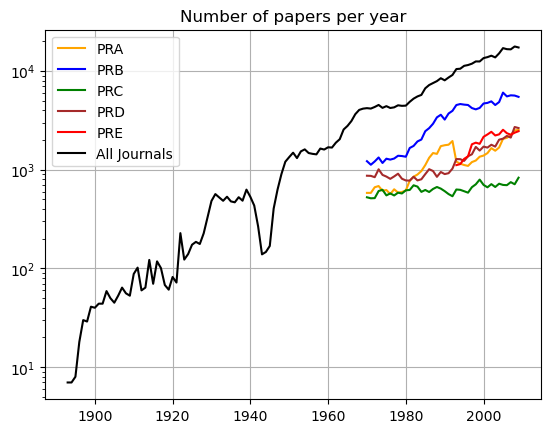

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x=xax, y=pra_no_papers, color = 'orange', label='PRA')
sns.lineplot(x=xax, y=prb_no_papers, color = 'blue', label='PRB')
sns.lineplot(x=xax, y=prc_no_papers, color = 'green', label='PRC')
sns.lineplot(x=xax, y=prd_no_papers, color = 'brown', label='PRD')
sns.lineplot(x=xax2, y=pre_no_papers, color = 'red', label='PRE')

sns.lineplot(x=xax3, y=no_papers_all, color = 'black', label='All Journals')

plt.title('Number of papers per year')
plt.grid()
plt.legend()
plt.yscale('log')

In [26]:
# No. of authors per paper

pra2 = pra.drop_duplicates(subset=['transaction'], keep='first')

# pra2['no_authors'].mean()
# pra2['no_authors'].std()

prb2 = prb.drop_duplicates(subset=['transaction'], keep='first')
prc2 = prc.drop_duplicates(subset=['transaction'], keep='first')
prd2 = prd.drop_duplicates(subset=['transaction'], keep='first')
pre2 = pre.drop_duplicates(subset=['transaction'], keep='first')
all2 = df2.drop_duplicates(subset=['transaction'], keep='first')

no_authors_per_paper_pra = list(pra2['no_authors'])
no_authors_per_paper_prb = list(prb2['no_authors'])
no_authors_per_paper_prc = list(prc2['no_authors'])
no_authors_per_paper_prd = list(prd2['no_authors'])
no_authors_per_paper_pre = list(pre2['no_authors'])
no_authors_per_paper_all = list(all2['no_authors'])

Text(0, 0.5, 'Probability')

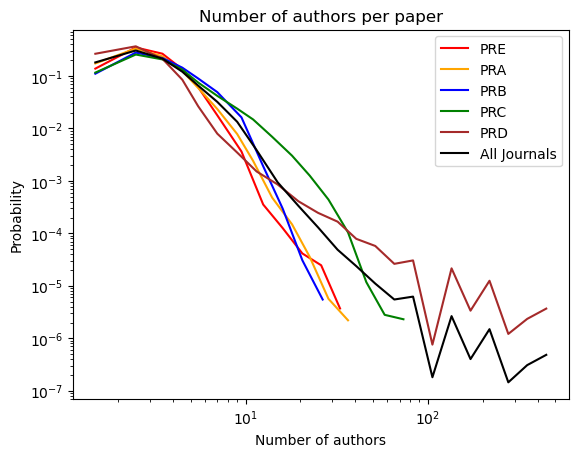

In [38]:
import powerlaw

fit_pre = powerlaw.Fit(data=no_authors_per_paper_pre, xmin = 1)
fit_pra = powerlaw.Fit(data=no_authors_per_paper_pra, xmin = 1)
fit_prb = powerlaw.Fit(data=no_authors_per_paper_prb, xmin = 1)
fit_prc = powerlaw.Fit(data=no_authors_per_paper_prc, xmin = 1)
fit_prd = powerlaw.Fit(data=no_authors_per_paper_prd, xmin = 1)
fit_all = powerlaw.Fit(data=no_authors_per_paper_all, xmin = 1)

fit_pre.plot_pdf(label='PRE', color = 'red')
fit_pra.plot_pdf(label='PRA', color = 'orange')
fit_prb.plot_pdf(label='PRB', color = 'blue')
fit_prc.plot_pdf(label='PRC', color = 'green')
fit_prd.plot_pdf(label='PRD', color = 'brown')
fit_all.plot_pdf(label='All Journals', color = 'black')

plt.legend()
plt.title('Number of authors per paper')
plt.xlabel('Number of authors')
plt.ylabel('Probability')

In [42]:
prd2['no_authors'].mean()

3.1635378705801243

In [43]:
prd2['no_authors'].std()

13.346357267680528

In [116]:
import datetime
begin_time = datetime.datetime.now()


no_papers_per_author_pra = []
authors_pra = list(pra['author'])

for i in authors_pra:
    no_papers_per_author_pra.append(authors_pra.count(i))

    
end_time = datetime.datetime.now()
runtime = end_time - begin_time
print (f'runtime: {runtime}')

pra['no_of_papers_per_author'] = no_papers_per_author_pra

no_papers_per_author_pra = list(pra.drop_duplicates(subset=['author'], keep='first')['no_of_papers_per_author'])

runtime: 0:06:01.483329


In [147]:
import datetime
begin_time = datetime.datetime.now()


no_papers_per_author_pre = []
authors_pre = list(pre['author'])

for i in authors_pre:
    no_papers_per_author_pre.append(authors_pre.count(i))

    
end_time = datetime.datetime.now()
runtime = end_time - begin_time
print (f'runtime: {runtime}')

pre['no_of_papers_per_author'] = no_papers_per_author_pre

no_papers_per_author_pre = list(pre.drop_duplicates(subset=['author'], keep='first')['no_of_papers_per_author'])

runtime: 0:02:25.159905


/tmp/ipykernel_5048/614455473.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre['no_of_papers_per_author'] = no_papers_per_author_pre


In [166]:
import datetime
begin_time = datetime.datetime.now()


no_papers_per_author_prb = []
authors_prb = list(prb['author'])

for i in authors_prb:
    no_papers_per_author_prb.append(authors_prb.count(i))

    
end_time = datetime.datetime.now()
runtime = end_time - begin_time
print (f'runtime: {runtime}')

prb['no_of_papers_per_author'] = no_papers_per_author_prb

no_papers_per_author_prb = list(prb.drop_duplicates(subset=['author'], keep='first')['no_of_papers_per_author'])

runtime: 0:55:15.236849


/tmp/ipykernel_5048/2916630360.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prb['no_of_papers_per_author'] = no_papers_per_author_prb


In [168]:
import datetime
begin_time = datetime.datetime.now()


no_papers_per_author_prc = []
authors_prc = list(prc['author'])

for i in authors_prc:
    no_papers_per_author_prc.append(authors_prc.count(i))

    
end_time = datetime.datetime.now()
runtime = end_time - begin_time
print (f'runtime: {runtime}')

prc['no_of_papers_per_author'] = no_papers_per_author_prc

no_papers_per_author_prc = list(prc.drop_duplicates(subset=['author'], keep='first')['no_of_papers_per_author'])

runtime: 0:02:51.172122


/tmp/ipykernel_5048/3354870388.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prc['no_of_papers_per_author'] = no_papers_per_author_prc


In [181]:
import datetime
begin_time = datetime.datetime.now()


no_papers_per_author_prd = []
authors_prd = list(prd['author'])

for i in authors_prd:
    no_papers_per_author_prd.append(authors_prd.count(i))

    
end_time = datetime.datetime.now()
runtime = end_time - begin_time
print (f'runtime: {runtime}')

prd['no_of_papers_per_author'] = no_papers_per_author_prd

no_papers_per_author_prd = list(prd.drop_duplicates(subset=['author'], keep='first')['no_of_papers_per_author'])

runtime: 0:06:50.091137


/tmp/ipykernel_5048/3751165323.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prd['no_of_papers_per_author'] = no_papers_per_author_prd


In [183]:
import datetime
begin_time = datetime.datetime.now()


no_papers_per_author_all = []
authors_all = list(df2['author'])

for i in authors_all:
    no_papers_per_author_all.append(authors_all.count(i))

    
end_time = datetime.datetime.now()
runtime = end_time - begin_time
print (f'runtime: {runtime}')

df2['no_of_papers_per_author'] = no_papers_per_author_all

no_papers_per_author_all = list(df2.drop_duplicates(subset=['author'], keep='first')['no_of_papers_per_author'])

runtime: 7:27:45.492333


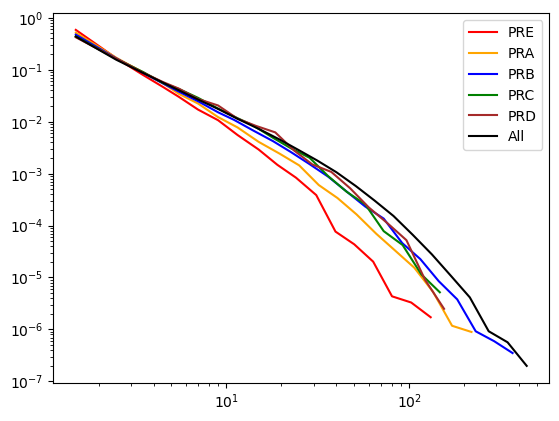

In [184]:
import powerlaw

fit_pre = powerlaw.Fit(data=no_papers_per_author_pre, xmin = 1)
fit_pra = powerlaw.Fit(data=no_papers_per_author_pra, xmin = 1)
fit_prb = powerlaw.Fit(data=no_papers_per_author_prb, xmin = 1)
fit_prc = powerlaw.Fit(data=no_papers_per_author_prc, xmin = 1)
fit_prd = powerlaw.Fit(data=no_papers_per_author_prd, xmin = 1)
fit_all = powerlaw.Fit(data=no_papers_per_author_all, xmin = 1)

fit_pre.plot_pdf(label='PRE', color = 'red')
fit_pra.plot_pdf(label='PRA', color = 'orange')
fit_prb.plot_pdf(label='PRB', color = 'blue')
fit_prc.plot_pdf(label='PRC', color = 'green')
fit_prd.plot_pdf(label='PRD', color = 'brown')
fit_all.plot_pdf(label='All', color = 'black')

plt.legend()

In [191]:
pd.DataFrame(no_papers_per_author_pre).to_csv('no_papers_per_author_pre')
pd.DataFrame(no_papers_per_author_pra).to_csv('no_papers_per_author_pra')
pd.DataFrame(no_papers_per_author_prb).to_csv('no_papers_per_author_prb')
pd.DataFrame(no_papers_per_author_prc).to_csv('no_papers_per_author_prc')
pd.DataFrame(no_papers_per_author_prd).to_csv('no_papers_per_author_prd')
pd.DataFrame(no_papers_per_author_all).to_csv('no_papers_per_author_all')